# EDA

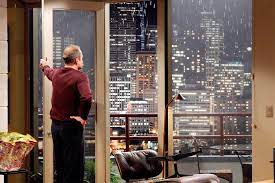

The purpose of this EDA is to find insights in the data of the housing market around Seattle to be able to answer some hypothesis and give help to one chosen stakeholder.
The Source of the data you can find here: **Source**

At the very beginning we import all required tools and libraries to be prepared for the further steps in the process.

In [123]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Understand your Data
Firstly we start our EDA by reading in our data and get some basic information for our dataset. Therefore we import our dataset into a dataframe and have a basic look at it.

In [124]:
df = pd.read_csv("data/King_County_House_prices_dataset.csv")
df.head(60)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


Now we need to know what information the different columns contain and have a look at the shape of our dataset, meaning how long and wide it is. Also we check which Datatype there are.

In [117]:
# checking the rows and columns
df.shape

(21597, 21)

In [87]:
#get some general Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Checking the data and have a look on Data types: 
* **Object:** We have a lot of object data-types in our dataset. This means, we have strings (meaning text) or mixed data-types in these columns. For some this is true - however talking about selling date or **sqft_basement** we need to change our data-types into a date format later on. 
<br>

* **int64:** Furthermore we have integers for the id, bedrooms, sqft_living/sqft_lot, zipcode and some others. This makes sense, since we are expecting numerical values in these columns.
<br>

* **float64:** Additionally we have floats for some of these. This makes also sense for columns like long and lat to calculate the geographical location of the house. For others like floors, yr_renovated or the bathrooms in contrast, it is a little off. So we have to keep that in mind for later steps in exploring and cleaning the data.
<br>
In this Table we can already see that our dataset is at a good basic starting point because there are no major gaps and no important data values are missing. Nevertheless we have different kinds of data types in our dataset to consider.
So generally we see the data is complete (it has no missing values) and is correct (has no obvious logical problems that defy our understanding of the content).

## Initial Hypotheses about the Dataset
<br>
After browsing through our data and figuring out, what data we have in front of us, i now want to build some hypotheses in relation to our expectations, about what is contained in the data.
The Following Hypotheses i will try to investigate in the upcoming steps:
<br>

1. The number of rooms tend to contribute to the selling price
2. The more actual living space the more the price increases
3. Depending on the zip-code there is a pattern in selling prices
4. Houses with better grades tend to have recently been renovated 
5. There are times during the year in which selling prices tend to be higher

I also want to have a clearer view of the data to be able to give some action recommendation to my chosen stakeholder Bonnie Brown.

    But who is Bonnie Brown??
* She is a **Seller**
* **She Has a house and wants to move soon** (so timing might be important)
* **She wants high profit** (as high as possible) in middle class Neighborhood
<br>

So finally we have to find some insights to help achieve these goals of the stakeholder.

## Exploration of the Data
<br>
To begin with our exploration we want to have a look at our numerical based columns to find some clues in it. We do it preferably with a histogram plot.

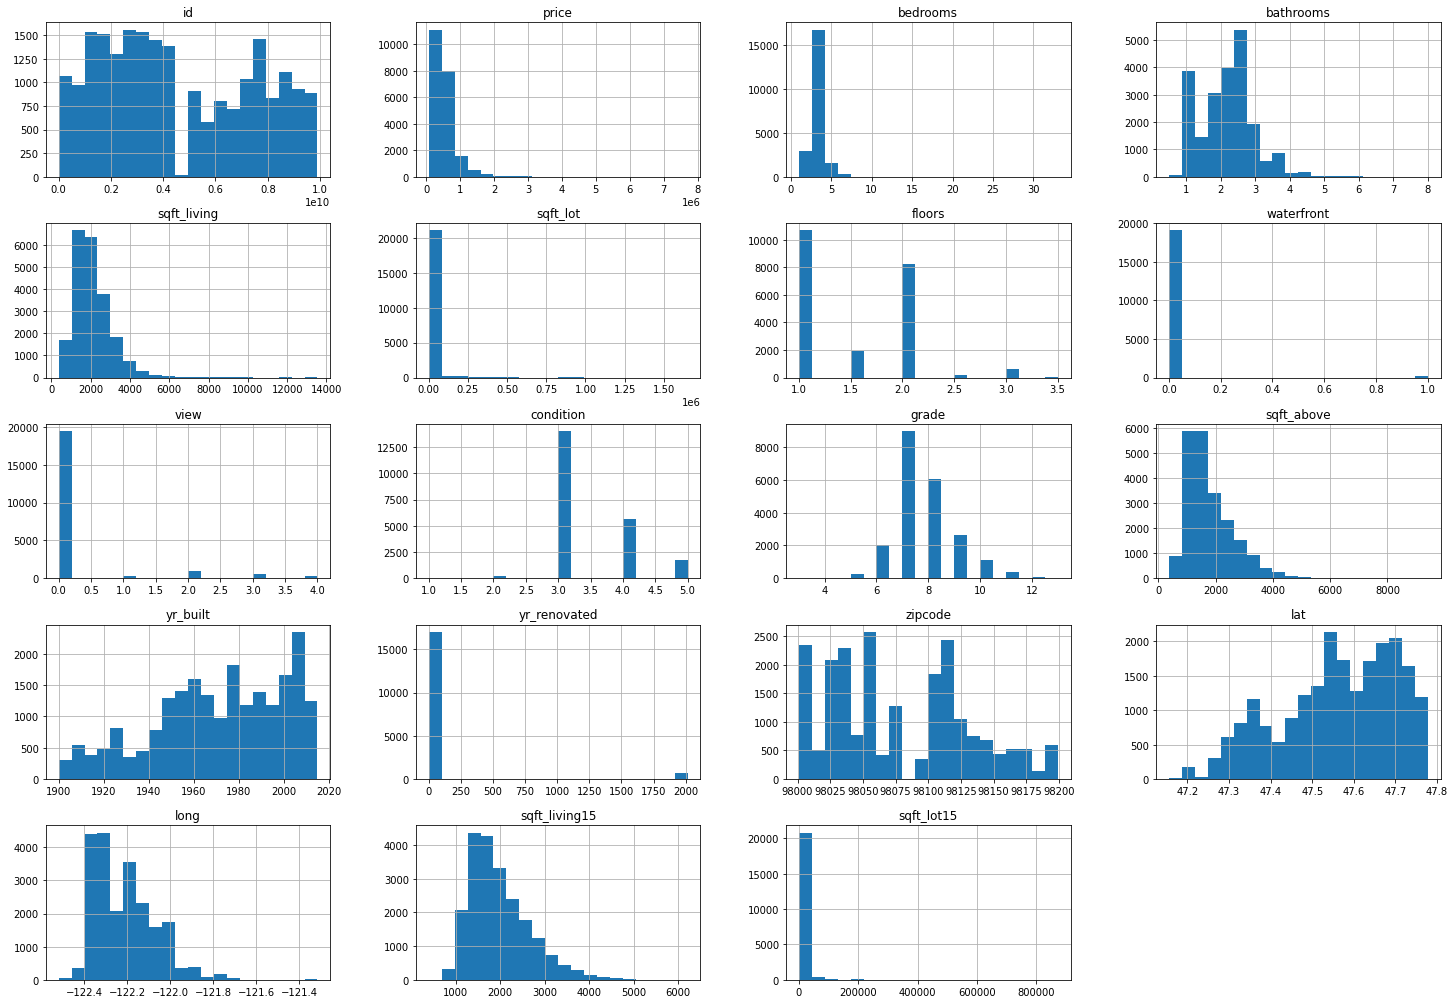

In [112]:
# Save names of all numerical columns in list
#column_num = df.select_dtypes(include=np.number).columns
#print(column_num)

#Plot histograms of all numerical columns
df.hist(bins=20, figsize=(25, 25), layout=(7, 4));

In the plots we can instantly see that some continous features of the dataset share a kind of normal distribution like for example the price or the actual living space of the houses. But we have also some categorical features like grade and condition which are also distributed in a similar kind.

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64


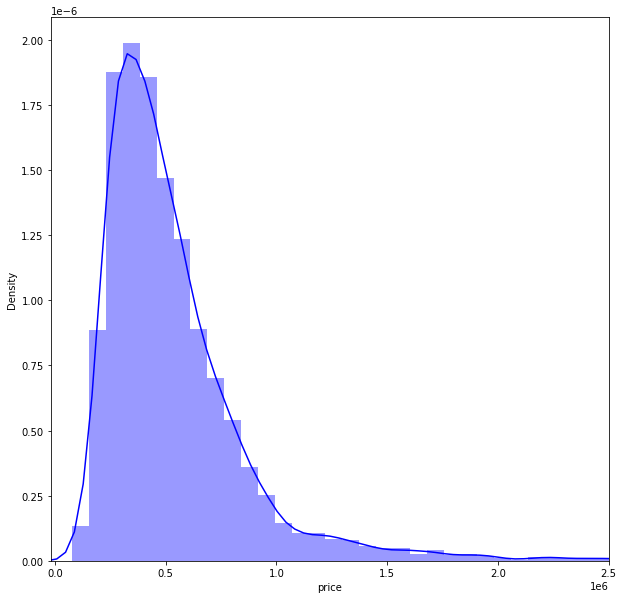

In [125]:
print(df['price'].describe())
plt.figure(figsize=(10, 10))
plt.xlim(-20000, 2500000) 
sns.distplot(df['price'], color='b', bins=100, hist_kws={'alpha': 0.4});

In this plot we see the most important column of the dataset and its distribution - the price. Here in this plot it gets very obvious that the price is right skewed and some outliers(extreme selling prices) lies above ~1.2 Mil. That means that our median and our mean is on the right side of the mode, which is on the top of the curve. The min and max value are relative far apart - which is expected based on the big difference in house pricing.

In the following we are also going to check the obvious categorical columns for some patterns. We do this with the help of some popular plots. 

   condition  count
2          3  14020
3          4   5677
4          5   1701
1          2    170
0          1     29


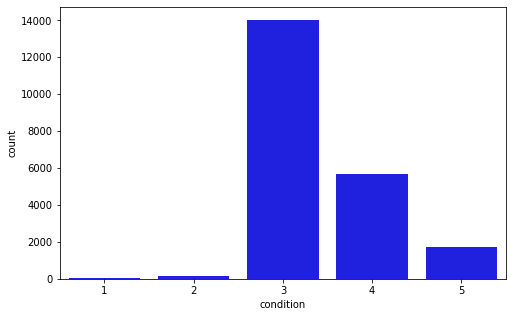

In [136]:
#count the groups for "condition" and "grade" and sort them based on their value
condition_dis = df.groupby(['condition']).count().reset_index()
condition_dis = condition_dis [['condition', 'id']].rename(columns=dict(id='count')).sort_values('count', ascending=False)

grade_dis = df.groupby(['grade']).count().reset_index()
grade_dis = grade_dis [['grade', 'id']].rename(columns=dict(id='count')).sort_values('count', ascending=False)

print(condition_dis)
sns.barplot(data=condition_dis, x="condition" , y="count" , color='b');
#condition_dis.describe()


    grade  count
4       7   8974
5       8   6065
6       9   2615
3       6   2038
7      10   1134
8      11    399
2       5    242
9      12     89
1       4     27
10     13     13
0       3      1


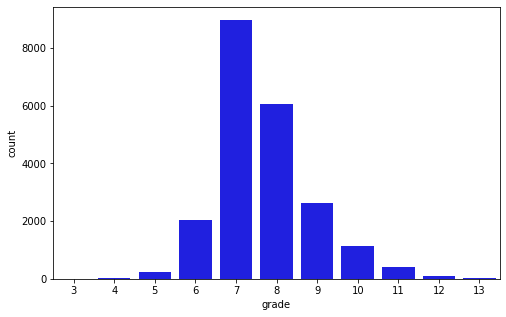

In [134]:
print(grade_dis)
sns.barplot(data=grade_dis, x="grade" , y="count" , color='b');

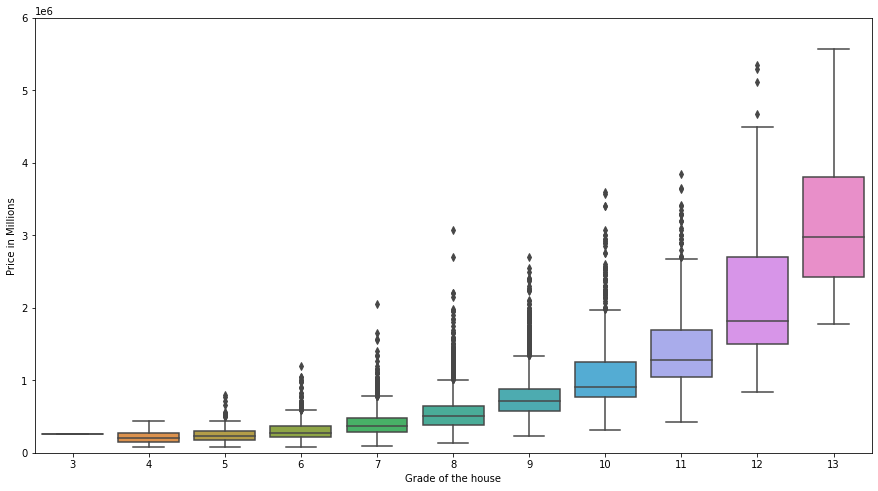

In [143]:
plt.figure(figsize = (15,8))
sns.boxplot(x=df.grade, y=df.price)
plt.ylabel('Price in Millions')
plt.ylim(0,6e6)
plt.xlabel('Grade of the house')
plt.show()

Regarding the grade column we can clearly see in the barplot that more than 90% of the awarded grades are either **7** or **8** - the absolute midfield out of 13 possible grades. Nearly the same goes for the condition. Here are about 65% distributed to **3** and almost 30% to **4**. 
<br>

In conclusion we can say that its hard to determine a significant difference between individual houses based on these 2 groups due to the a more generous division into these. But what you can also see in the boxplot above is the connection between pricing and the grade of the house. Beyond that its also noticeable that some sellers were able to sell their houses for a better price than you would expect from the look at the grades. This is very obvious for the grades from **7** to **9**.

<br>
In the boxplot of the zip code distribution you can have a glance of the wide variety of the included areas of seattle. There are also a lot of outliers which emphasizes that its quite hard to group the house prices purely based on there connected zip-code.
Nevertheless One remarkable area for a consistently good price would be the green box for the zip code of 98039 - the upscale district of medina.

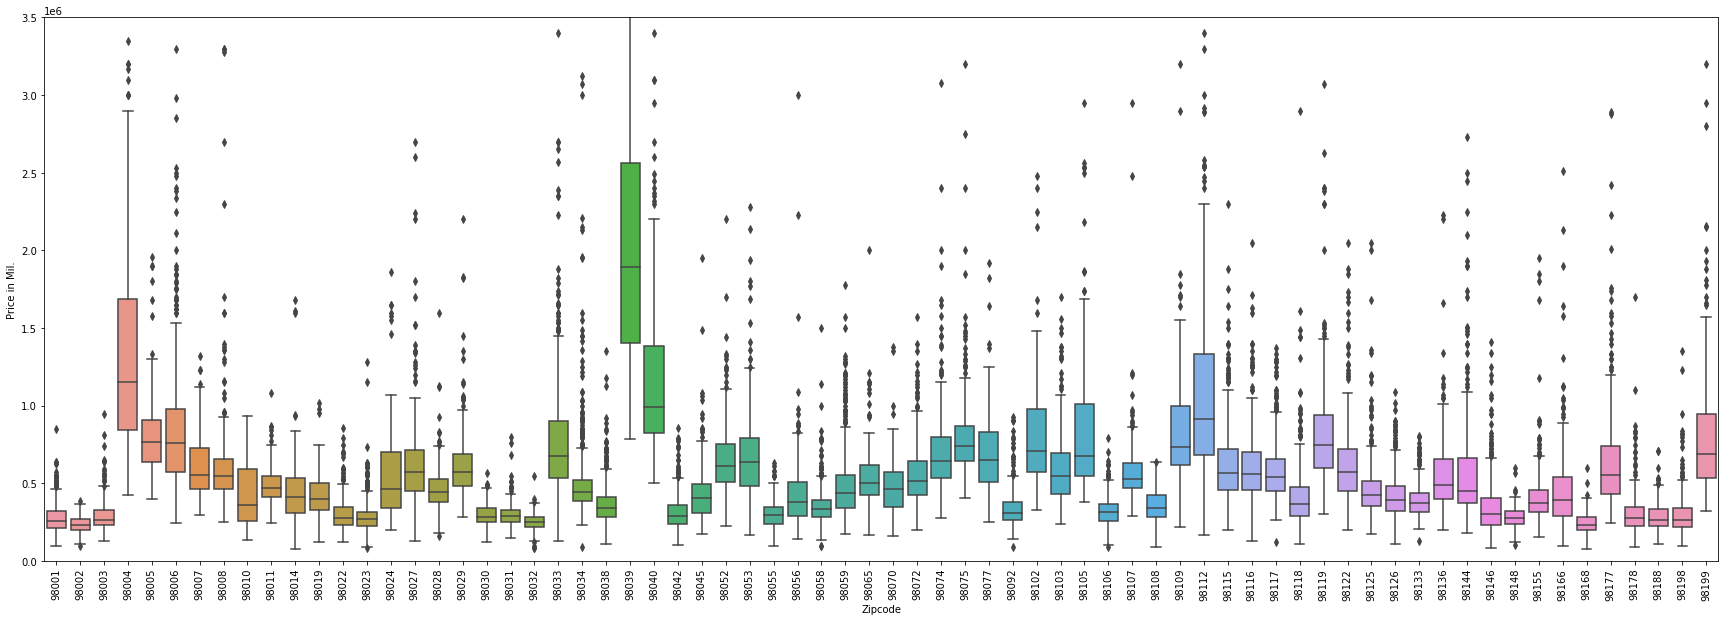

In [150]:
plt.figure(figsize = (30,10))
sns.boxplot(x=df.zipcode, y=df.price)
plt.ylabel('Price in Mil.')
plt.ylim(0,3.5e6)
plt.xlabel('Zipcode')
plt.xticks(rotation=90)
plt.show()

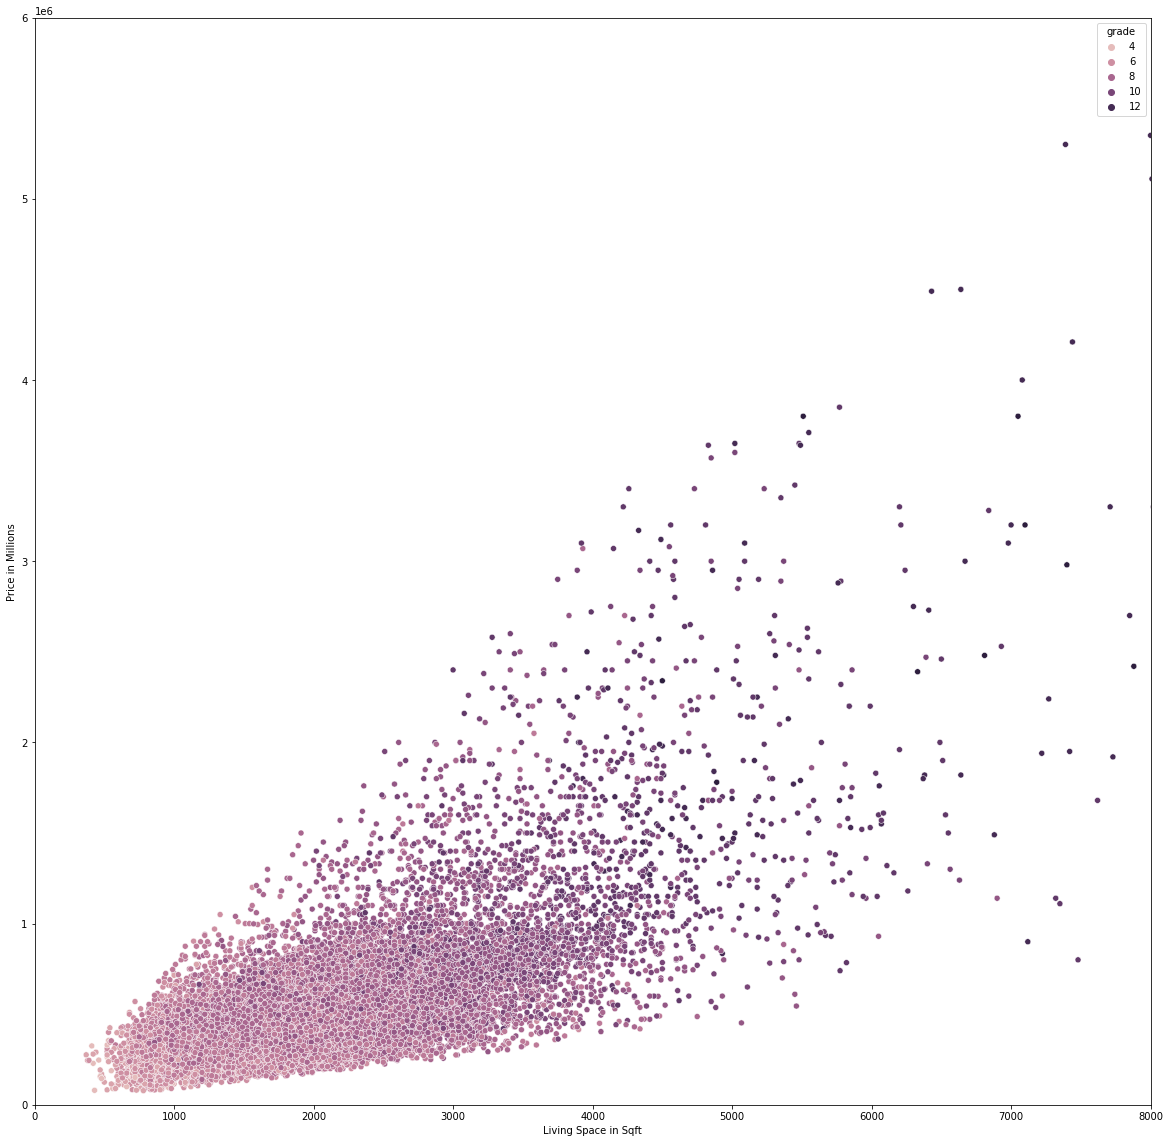

In [139]:
plt.figure(figsize = (20,20))
sns.scatterplot(x=df.sqft_living, y=df.price, hue=df.grade)
plt.ylabel('Price in Millions')
plt.ylim(0,6e6)
plt.xlim(0,8000)
plt.xlabel('Living Space in Sqft')
plt.show()

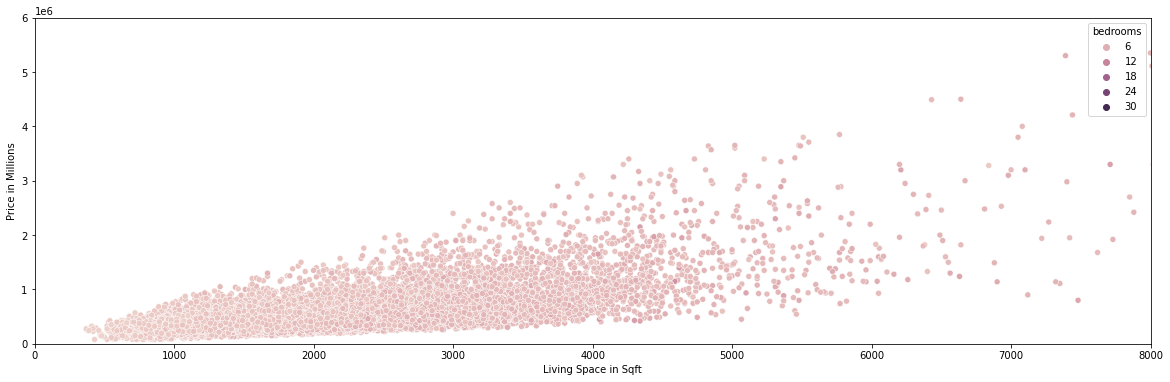

In [83]:
plt.figure(figsize = (20,6))
sns.scatterplot(x=df.sqft_living, y=df.price, hue=df.bedrooms)
plt.ylabel('Price in Millions')
plt.ylim(0,6e6)
plt.xlim(0,8000)
plt.xlabel('Living Space in Sqft')
plt.show()

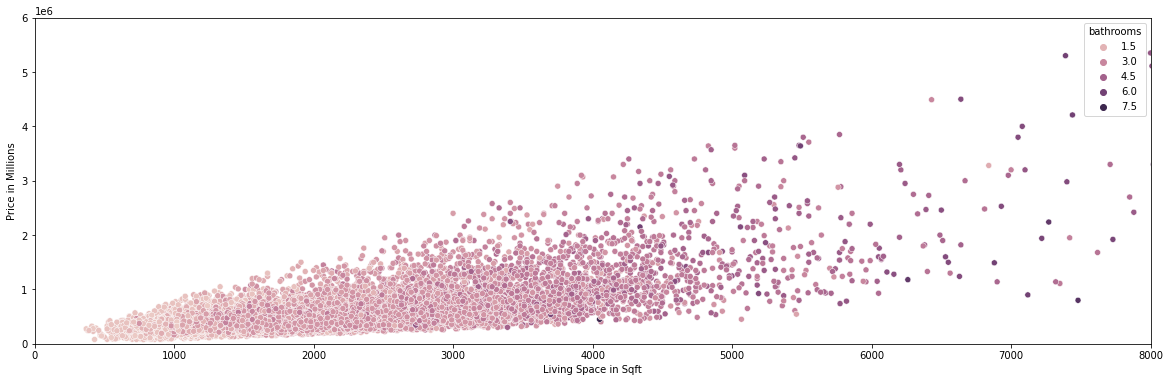

In [84]:
plt.figure(figsize = (20,6))
sns.scatterplot(x=df.sqft_living, y=df.price, hue=df.bathrooms)
plt.ylabel('Price in Millions')
plt.ylim(0,6e6)
plt.xlim(0,8000)
plt.xlabel('Living Space in Sqft')
plt.show()